In [2]:
# СОСНЮК КАТЕРИНА ФІТ 4-6 ВАРІАНТ 22 
# Загрузіть цей файл.
import pandas as pd
import csv
xls_file = pd.ExcelFile('shopping_trends.xlsx')
df = xls_file.parse(xls_file.sheet_names[0])
df.to_csv('output.csv', index=False)
with open('output.csv', 'r') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)
column_names = []
for row in data[0]:
    column_names.append(row.split(','))
column_names
data_rows = []
for row in data:
    if data.index(row)!=0:
        data_rows.append(row[0].split(','))
df = pd.DataFrame(data_rows, columns=column_names[0])
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
# Перевірте розмір таблиці, наявність пропусків, тип стовпців.  
df.shape


(3900, 19)

In [4]:
missing_values = df.isna().sum()
missing_values
#ПРОПУСКІВ НЕМАЄ

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [5]:
df.dtypes
#ТИПИ ДАНИХ object

Customer ID                 object
Age                         object
Gender                      object
Item Purchased              object
Category                    object
Purchase Amount (USD)       object
Location                    object
Size                        object
Color                       object
Season                      object
Review Rating               object
Subscription Status         object
Payment Method              object
Shipping Type               object
Discount Applied            object
Promo Code Used             object
Previous Purchases          object
Preferred Payment Method    object
Frequency of Purchases      object
dtype: object

In [6]:
# Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці. 
selected_columns = ['Age', 'Purchase Amount (USD)','Review Rating','Previous Purchases']
new_df = df[selected_columns].copy()
new_df

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31
...,...,...,...,...
3895,40,28,4.2,32
3896,52,49,4.5,41
3897,46,33,2.9,24
3898,44,77,3.8,24


In [7]:
 # Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).
new_df.rename(columns={'Age': 'age', 'Purchase Amount (USD)': 'purchase_amount_usd', 'Review Rating':'review_rating', 'Previous Purchases': 'previous_purchases'}, inplace=True)
new_df

,age,purchase_amount_usd,review_rating,previous_purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31
...,...,...,...,...
3895,40,28,4.2,32
3896,52,49,4.5,41
3897,46,33,2.9,24
3898,44,77,3.8,24


In [8]:
# Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод)
from sklearn.preprocessing import StandardScaler
new_df = new_df.astype(float)
numeric_df = new_df.select_dtypes(include=['float'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)
scaled_df = pd.concat([scaled_df, new_df.select_dtypes(exclude=['number'])], axis=1)
scaled_df

,age,purchase_amount_usd,review_rating,previous_purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


In [9]:
# Використайте метод ліктя (Elbow Method), щоб визначити оптимальну кількість кластерів. Цей метод вимагає повторної кластеризації даних
# для різної кількості кластерів і обчислення вартості кластерів. 
# Вартість кластерів зазвичай обчислюється за допомогою суми квадратів відстаней між точками і центроїдами кластерів. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
distortions = []
K = range(1, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    distortions.append(kmeans.inertia_)
distortions

C:\Users\S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1

[15600.000000000011,
 12629.296422696556,
 10819.918027931475,
 9363.128365497654,
 8277.65620604946,
 7512.463045195081,
 6754.92985282364,
 5999.381097203919,
 5624.469600147947,
 5284.619067293504]

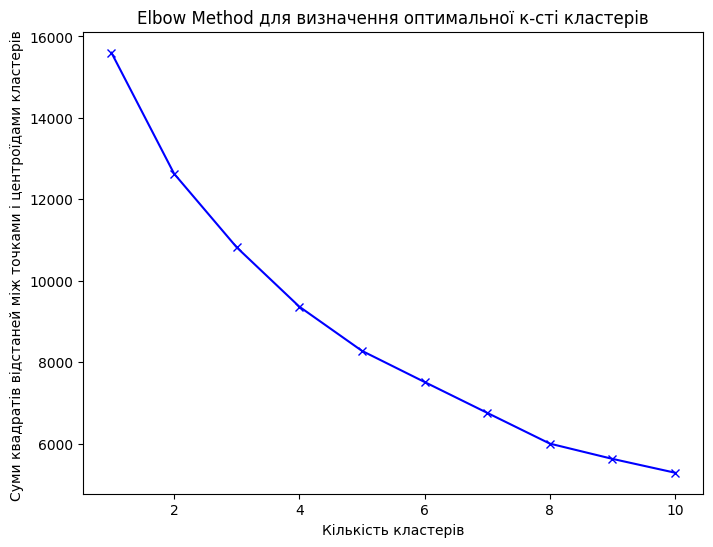

In [10]:
# Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", 
# де спостерігається різке зменшення вартості кластерів. Це і буде оптимальною кількістю кластерів. 
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Суми квадратів відстаней між точками і центроїдами кластерів ')
plt.title('Elbow Method для визначення оптимальної к-сті кластерів')
plt.show()
#ОПТИМАЛЬНА К-СТЬ КЛАСТЕРІВ - 9

In [11]:
# Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means. 

# Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера. 
from sklearn.cluster import KMeans

num_clusters = 9  

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
scaled_df['Cluster'] = kmeans.fit_predict(scaled_df)
scaled_df['Cluster']
cluster_centers = kmeans.cluster_centers_  
cluster_labels = kmeans.labels_  
print(scaled_df['Cluster'].value_counts())


6    482
2    474
1    454
8    452
5    451
0    433
3    430
7    425
4    299
Name: Cluster, dtype: int64


C:\Users\S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


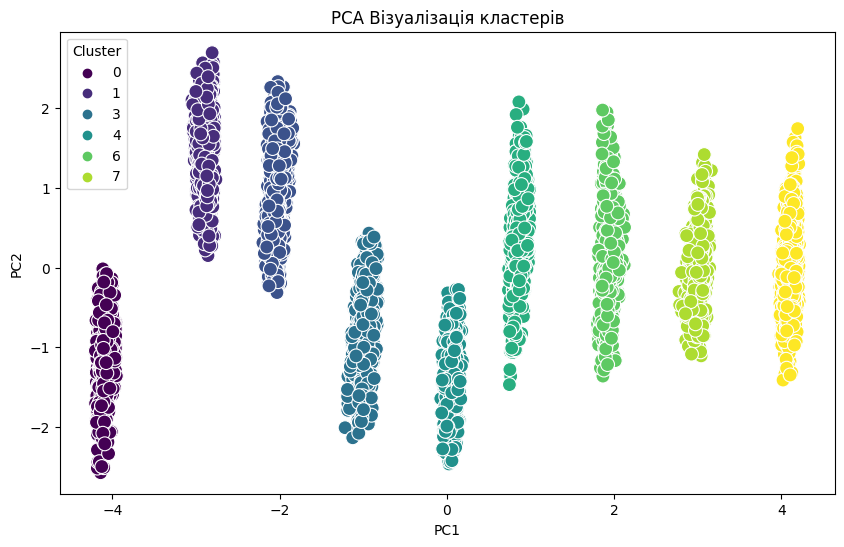

In [12]:
# Якщо ви хочете візуалізувати дані, які мають більше двох ознак, ви можете використовувати метод головних компонентів (PCA) 
# для зменшення розмірності даних і подальшої візуалізації. 
# PCA допоможе вам зменшити кількість ознак до 2 або 3, щоб побудувати графіки. 
from sklearn.decomposition import PCA
import seaborn as sns
num_components = 2 
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_df)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = scaled_df['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('PCA Візуалізація кластерів')
plt.show()

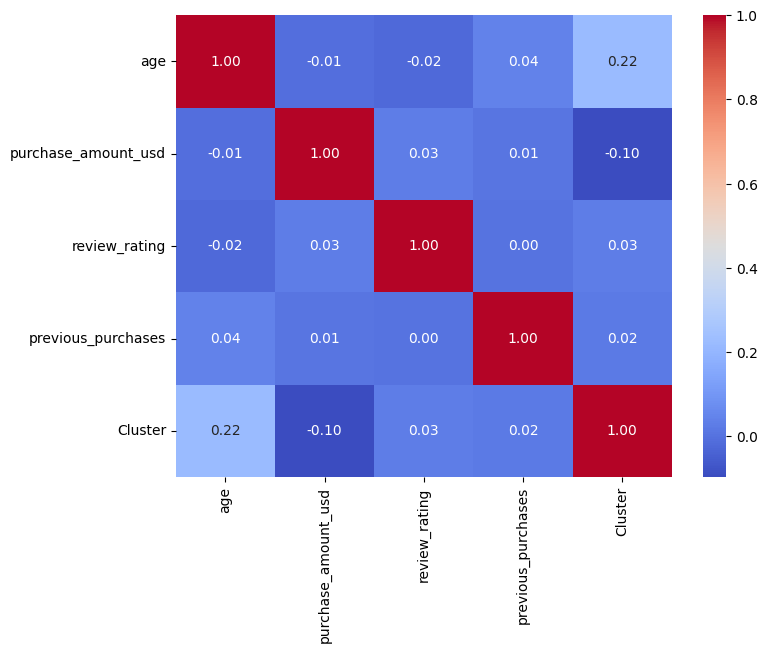

In [13]:
# Побудувати теплокарту кореляції для попереднього завдання. 
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [22]:
#ВИСНОВОК Дані було підготовлено та проаналізовано за допомогою Elbow Method та K-means. Було отримано значення kmeans кластерів, результати було візуалізовано за допомогою seaborn.sns. 